## loading package

In [1]:
!pip install pandas geopandas shapely

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

pd.set_option('display.max_columns', None)

## loading data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ds340/nypd complaint data/1. adding zipcode to initial data/NYPD_Complaint_Data_Historic_20241110.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,279750914,12/20/2022,00:01:00,08/01/2023,12:00:00,71.0,12/31/2023,109,GRAND LARCENY,405.0,"LARCENY,GRAND BY THEFT OF CREDIT CARD",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),996766.0,178845.0,UNKNOWN,UNKNOWN,U,NaN,40.657557,-73.954888,"(40.657557, -73.954888)",PATROL BORO BKLYN SOUTH,(null),UNKNOWN,UNKNOWN,F
1,279714407,12/13/2022,09:00:00,12/14/2022,15:30:00,13.0,12/30/2023,109,GRAND LARCENY,458.0,"LARCENY,GRAND FROM RESIDENCE/BUILDING,UNATTEND...",COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),991346.0,205375.0,UNKNOWN,UNKNOWN,U,NaN,40.730383,-73.974394,"(40.730383, -73.974394)",PATROL BORO MAN SOUTH,(null),65+,WHITE,M
2,279723001,12/15/2022,13:00:00,12/29/2023,14:00:00,62.0,12/29/2023,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),986958.0,160468.0,25-44,WHITE,F,NaN,40.607125,-73.990245,"(40.607125, -73.990245)",PATROL BORO BKLYN SOUTH,(null),25-44,WHITE,F
3,279694115,04/20/2022,12:00:00,09/24/2022,03:00:00,105.0,12/29/2023,341,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),1053688.0,203981.0,(null),(null),(null),NaN,40.726287,-73.749476,"(40.726287, -73.749476)",PATROL BORO QUEENS SOUTH,(null),45-64,ASIAN / PACIFIC ISLANDER,F
4,279749489,03/20/2022,18:45:00,03/20/2022,18:50:00,94.0,12/29/2023,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),997081.0,206903.0,25-44,WHITE,F,NaN,40.734570,-73.953698,"(40.73457, -73.953698)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,M


## summarize data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529839 entries, 0 to 529838
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         529839 non-null  object 
 1   CMPLNT_FR_DT       529839 non-null  object 
 2   CMPLNT_FR_TM       529839 non-null  object 
 3   CMPLNT_TO_DT       490922 non-null  object 
 4   CMPLNT_TO_TM       529839 non-null  object 
 5   ADDR_PCT_CD        529810 non-null  float64
 6   RPT_DT             529839 non-null  object 
 7   KY_CD              529839 non-null  int64  
 8   OFNS_DESC          529839 non-null  object 
 9   PD_CD              529410 non-null  float64
 10  PD_DESC            529839 non-null  object 
 11  CRM_ATPT_CPTD_CD   529839 non-null  object 
 12  LAW_CAT_CD         529839 non-null  object 
 13  BORO_NM            529839 non-null  object 
 14  LOC_OF_OCCUR_DESC  529839 non-null  object 
 15  PREM_TYP_DESC      529839 non-null  object 
 16  JU

### data dictionary

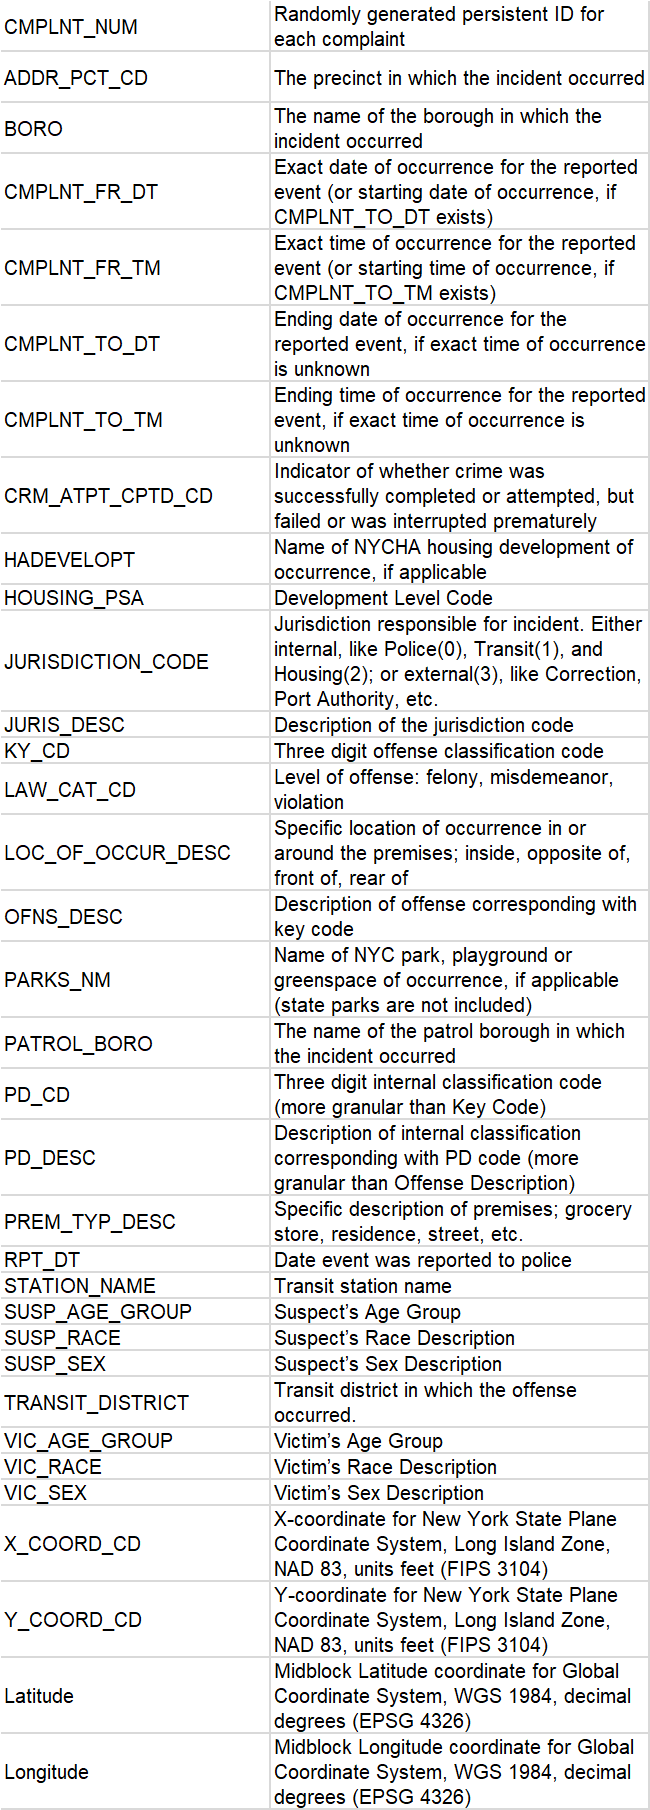

## missingness




### replacing (null) to actual NULL value

In [5]:
df = df.replace('(null)', np.nan)
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,279750914,12/20/2022,00:01:00,08/01/2023,12:00:00,71.0,12/31/2023,109,GRAND LARCENY,405.0,"LARCENY,GRAND BY THEFT OF CREDIT CARD",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,NaN,NaN,NaN,996766.0,178845.0,UNKNOWN,UNKNOWN,U,NaN,40.657557,-73.954888,"(40.657557, -73.954888)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,F
1,279714407,12/13/2022,09:00:00,12/14/2022,15:30:00,13.0,12/30/2023,109,GRAND LARCENY,458.0,"LARCENY,GRAND FROM RESIDENCE/BUILDING,UNATTEND...",COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,NaN,NaN,NaN,991346.0,205375.0,UNKNOWN,UNKNOWN,U,NaN,40.730383,-73.974394,"(40.730383, -73.974394)",PATROL BORO MAN SOUTH,NaN,65+,WHITE,M
2,279723001,12/15/2022,13:00:00,12/29/2023,14:00:00,62.0,12/29/2023,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,NaN,NaN,NaN,986958.0,160468.0,25-44,WHITE,F,NaN,40.607125,-73.990245,"(40.607125, -73.990245)",PATROL BORO BKLYN SOUTH,NaN,25-44,WHITE,F
3,279694115,04/20/2022,12:00:00,09/24/2022,03:00:00,105.0,12/29/2023,341,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0,NaN,NaN,NaN,1053688.0,203981.0,NaN,NaN,NaN,NaN,40.726287,-73.749476,"(40.726287, -73.749476)",PATROL BORO QUEENS SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,F
4,279749489,03/20/2022,18:45:00,03/20/2022,18:50:00,94.0,12/29/2023,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,NaN,NaN,NaN,997081.0,206903.0,25-44,WHITE,F,NaN,40.734570,-73.953698,"(40.73457, -73.953698)",PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,M


### check missingness in each col

In [6]:
n = df.isnull().mean()
n.sort_values(ascending=False)

,0
HADEVELOPT,0.997039
PARKS_NM,0.993717
TRANSIT_DISTRICT,0.978782
STATION_NAME,0.978782
HOUSING_PSA,0.936230
SUSP_SEX,0.178048
SUSP_RACE,0.178048
SUSP_AGE_GROUP,0.178048
LOC_OF_OCCUR_DESC,0.173200
CMPLNT_TO_DT,0.073451


<Axes: >

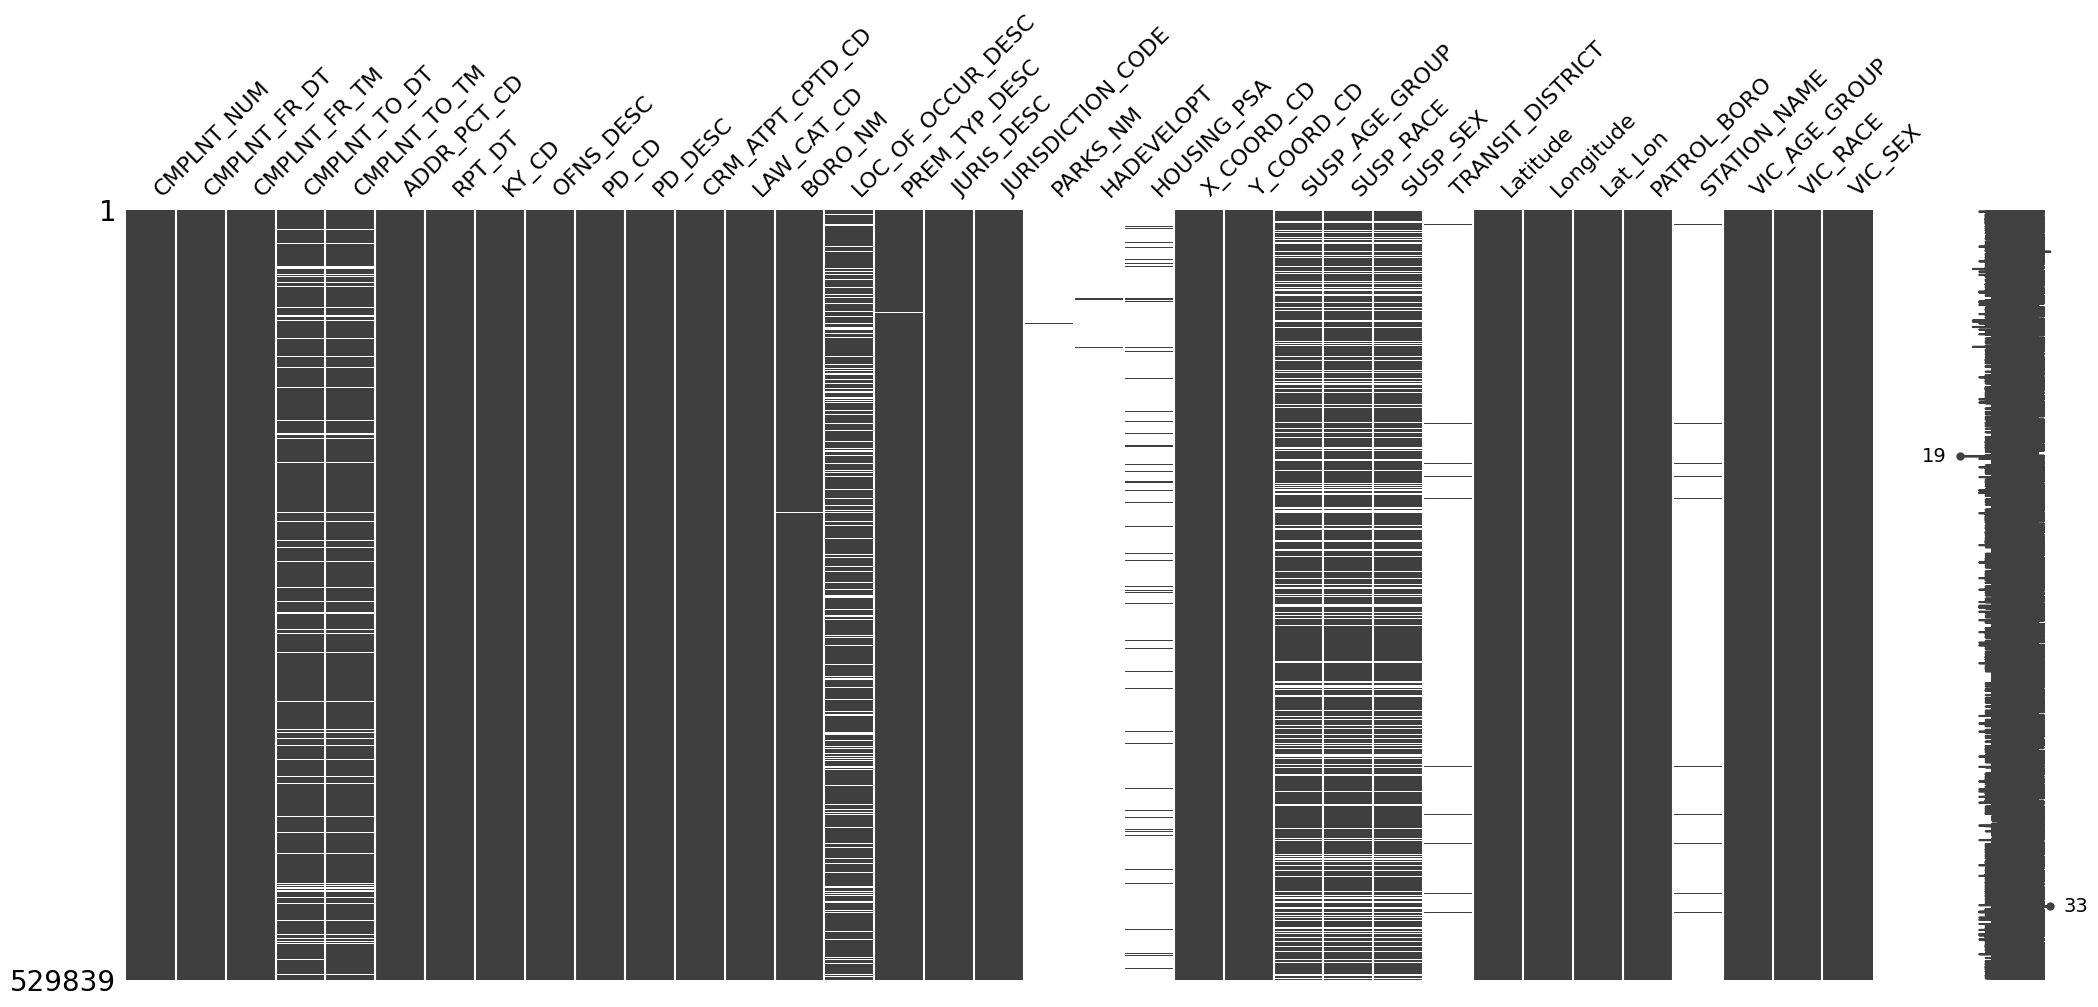

In [7]:
import missingno as msno
msno.matrix(df)

### remove columns with high missingness

having over 30% of missing value is concerning. since 'HADEVELOPT', 'PARKS_NM', 'STATION_NAME', 'HOUSING_PSA' and 'TRANSIT_DISTRICT' over 90% of missingness, we will remove the variables,

In [8]:
print(df.shape)

df = df.drop(['HADEVELOPT', 'PARKS_NM', 'STATION_NAME', 'HOUSING_PSA', 'TRANSIT_DISTRICT'], axis=1)

print(df.shape)

(529839, 35)
(529839, 30)


## feature engineering

### split CMPLNT_FR_DT to MONTH, YEAR and DATE.

We are going to use CMPLNT_FR_DT since we are interested in closest time to actual occurence time of crime.

In [9]:
def parse_year(date):
    return int(date.split('/')[2])

def parse_month(date):
    return int(date.split('/')[0])

def parse_day(date):
    return int(date.split('/')[1])

In [10]:
df['CMPLNT_FR_YEAR'] = df['CMPLNT_FR_DT'].apply(parse_year)
df['CMPLNT_FR_MONTH'] = df['CMPLNT_FR_DT'].apply(parse_month)
df['CMPLNT_FR_DAY'] = df['CMPLNT_FR_DT'].apply(parse_day)
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY
0,279750914,12/20/2022,00:01:00,08/01/2023,12:00:00,71.0,12/31/2023,109,GRAND LARCENY,405.0,"LARCENY,GRAND BY THEFT OF CREDIT CARD",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,996766.0,178845.0,UNKNOWN,UNKNOWN,U,40.657557,-73.954888,"(40.657557, -73.954888)",PATROL BORO BKLYN SOUTH,UNKNOWN,UNKNOWN,F,2022,12,20
1,279714407,12/13/2022,09:00:00,12/14/2022,15:30:00,13.0,12/30/2023,109,GRAND LARCENY,458.0,"LARCENY,GRAND FROM RESIDENCE/BUILDING,UNATTEND...",COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,991346.0,205375.0,UNKNOWN,UNKNOWN,U,40.730383,-73.974394,"(40.730383, -73.974394)",PATROL BORO MAN SOUTH,65+,WHITE,M,2022,12,13
2,279723001,12/15/2022,13:00:00,12/29/2023,14:00:00,62.0,12/29/2023,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,986958.0,160468.0,25-44,WHITE,F,40.607125,-73.990245,"(40.607125, -73.990245)",PATROL BORO BKLYN SOUTH,25-44,WHITE,F,2022,12,15
3,279694115,04/20/2022,12:00:00,09/24/2022,03:00:00,105.0,12/29/2023,341,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0,1053688.0,203981.0,NaN,NaN,NaN,40.726287,-73.749476,"(40.726287, -73.749476)",PATROL BORO QUEENS SOUTH,45-64,ASIAN / PACIFIC ISLANDER,F,2022,4,20
4,279749489,03/20/2022,18:45:00,03/20/2022,18:50:00,94.0,12/29/2023,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,997081.0,206903.0,25-44,WHITE,F,40.734570,-73.953698,"(40.73457, -73.953698)",PATROL BORO BKLYN NORTH,25-44,WHITE,M,2022,3,20


### create zipcode variable using longitude and latitude

In [ ]:
nyc_zipcode = gpd.read_file('/content/drive/MyDrive/ds340/nypd complaint data/adding zipcode to initial data/Modified Zip Code Tabulation Areas (MODZCTA)_20241012.geojson')

df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
df_gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

df_gdf_zip = gpd.sjoin(df_gdf, nyc_zipcode, how='left')

In [12]:
df_gdf_zip['zipcode'] = df_gdf_zip['modzcta']

df_gdf_zip.drop(['label', 'zcta', 'index_right', 'modzcta'], axis = 1)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,geometry,pop_est,zipcode
0,279750914,12/20/2022,00:01:00,08/01/2023,12:00:00,71.0,12/31/2023,109,GRAND LARCENY,405.0,"LARCENY,GRAND BY THEFT OF CREDIT CARD",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,996766.0,178845.0,UNKNOWN,UNKNOWN,U,40.657557,-73.954888,"(40.657557, -73.954888)",PATROL BORO BKLYN SOUTH,UNKNOWN,UNKNOWN,F,2022,12,20,POINT (-73.95489 40.65756),58882,11225
1,279714407,12/13/2022,09:00:00,12/14/2022,15:30:00,13.0,12/30/2023,109,GRAND LARCENY,458.0,"LARCENY,GRAND FROM RESIDENCE/BUILDING,UNATTEND...",COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,991346.0,205375.0,UNKNOWN,UNKNOWN,U,40.730383,-73.974394,"(40.730383, -73.974394)",PATROL BORO MAN SOUTH,65+,WHITE,M,2022,12,13,POINT (-73.97439 40.73038),57925,10009
2,279723001,12/15/2022,13:00:00,12/29/2023,14:00:00,62.0,12/29/2023,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,986958.0,160468.0,25-44,WHITE,F,40.607125,-73.990245,"(40.607125, -73.990245)",PATROL BORO BKLYN SOUTH,25-44,WHITE,F,2022,12,15,POINT (-73.99024 40.60712),92946,11214
3,279694115,04/20/2022,12:00:00,09/24/2022,03:00:00,105.0,12/29/2023,341,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0,1053688.0,203981.0,NaN,NaN,NaN,40.726287,-73.749476,"(40.726287, -73.749476)",PATROL BORO QUEENS SOUTH,45-64,ASIAN / PACIFIC ISLANDER,F,2022,4,20,POINT (-73.74948 40.72629),24037,11427
4,279749489,03/20/2022,18:45:00,03/20/2022,18:50:00,94.0,12/29/2023,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,997081.0,206903.0,25-44,WHITE,F,40.734570,-73.953698,"(40.73457, -73.953698)",PATROL BORO BKLYN NORTH,25-44,WHITE,M,2022,3,20,POINT (-73.9537 40.73457),36492,11222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529834,238514267,01/01/2022,13:35:00,01/01/2022,13:40:00,73.0,01/01/2022,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,1010953.0,180954.0,45-64,BLACK,M,40.663314,-73.903748,"(40.663314, -73.903748)",PATROL BORO BKLYN NORTH,65+,BLACK,F,2022,1,1,POINT (-73.90375 40.66331),76527,11212
529835,238526741,01/01/2022,01:30:00,01/01/2022,13:00:00,103.0,01/01/2022,351,CRIMINAL MISCHIEF & RELATED OF,254.0,"MISCHIEF, CRIMINAL 4, OF MOTOR",COMPLETED,MISDEMEANOR,QUEENS,NaN,STREET,N.Y. POLICE DEPT,0,1043847.0,198594.0,NaN,NaN,NaN,40.711571,-73.785029,"(40.71157064, -73.78502875)",PATROL BORO QUEENS SOUTH,25-44,ASIAN / PACIFIC ISLANDER,M,2022,1,1,POINT (-73.78503 40.71157),62053,11432
529836,238492710,01/01/2022,00:22:00,01/01/2022,00:25:00,42.0,01/01/2022,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,FELONY,BRONX,NaN,STREET,N.Y. POLICE DEPT,0,1010441.0,244053.0,NaN,NaN,NaN,40.836506,-73.905350,"(40.83650554, -73.90534959)",PATROL BORO BRONX,UNKNOWN,UNKNOWN,E,2022,1,1,POINT (-73.90535 40.83651),94218,10456
529837,238516862,01/01/2022,01:52:00,01/01/2022,01:55:00,46.0,01/01/2022,121,CRIMINAL MISCHIEF & RELATED OF,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",COMPLETED,FELONY,BRONX,INSIDE,OTHER,N.Y. POLICE DEPT,0,1011625.0,251038.0,UNKNOWN,BLACK HISPANIC,M,40.855675,-73.901040,"(40.855675, -73.90104)",PATROL BORO BRONX,UNKNOWN,UNKNOWN,D,2022,1,1,POINT (-73.90104 40.85568),74554,10457


## export the final data

In [13]:
df_gdf_zip.to_csv('/content/drive/MyDrive/ds340/nypd complaint data/1. adding zipcode to initial data/nypd_complaint_cleaned_zipcode.csv')